In [27]:
## Importando as bibliotecas e carregando arquivo .csv
import pandas as pd 
import numpy as np
data = pd.read_csv('data.csv')

In [28]:
## Substituindo campos vazios e com caracteres invalidos no arquivo.csv
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [29]:
## Visualizando valores substituidos
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='survived', ylabel='fare'>

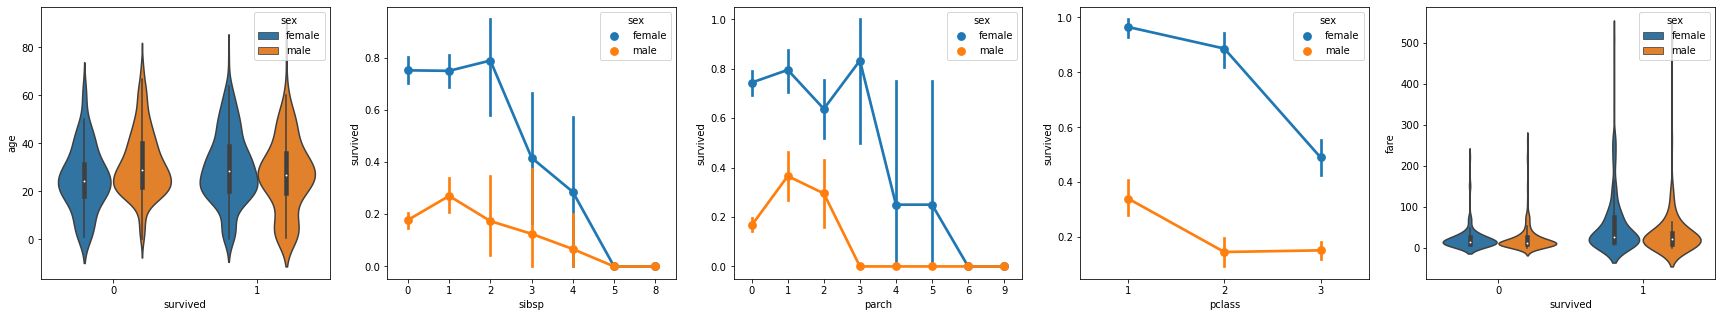

In [30]:
## Gerando gráficos comparando as colunas: age, sibsp, parch, pclass e fare com a coluna survived
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
## Convertento o genero male e female de string para inteiro
data.replace({'male':1, 'female': 0}, inplace=True)

In [6]:
## Analisando a correlação dos dados de entrada para identificar quais são as melhores entradas para o modelo de aprendizado
## Quanto mais proximo o valor tiver de um, maior será a correlação entre o valor e o resultado
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [7]:
## criando uma nova coluna denominada RELATIVES, agrupando os dados das colunas parch e sibsp para verifircar a correlação
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [9]:
## A partir do resultado listado acima, nota-se que se uma pessoa tinha parentes, versus quantos parentes, há uma ##correlação maior com a sobrevivência, sendo assim, as colunas sibsp e parch podem ser removidas do modelo, mantendo apenas
## a coluna relatives
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [10]:
## Treinando o modelo utilizando um percentual dos dados
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
## Normalizando as entrada: Igualando os intervalos de idade que variam de 0 a 100 e os de genero que variam de 0 a 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
## Uitilizando o algoritmo Naive Bayes, comum para problemas de classificação
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
## Testando o modelo no conjunto de dados que foi impedido de treinar
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
## O resultado abaixo nos mostra uma precisão de 75% na estimativa de sobrevivência

0.7464114832535885


In [15]:
## Importando as bibliotecas
import tensorflow as tf
from tensorflow import keras

In [17]:
## Utilizando rede neural sequencial com keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [18]:
## Add as camadas da rede neural
## A primeira camada será definida para ter uma dimensão de 5, já que você tem 5 entradas: sexo, pclass, idade, parentes e tarifa.
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))

## A camada do meio foi mantida em 5 para simplificar, embora esse valor pudesse ser diferente.
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))

## A última camada deve produzir 1, pois você deseja uma saída unidimensional indicando se um passageiro sobreviveria.
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))



In [19]:
## Consultando o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [20]:
## Compilando o modelo e definindo o otimizador
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 30s 2ms/step - loss: 0.6926 - accuracy: 0.6106
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.6014
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5878
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.7277
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.7801
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7578
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7790
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7514
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7708
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7870
Epoch 11/50
27/27 

In [21]:
## Verificando desempenho do modelo treinado
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

## Com base no resultado abaixo é notável que esse modelo possui 79% de precisão

C:\Users\taynna.silva\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
0.784688995215311
